In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from neuralnet.engine import Value
from neuralnet.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(42)

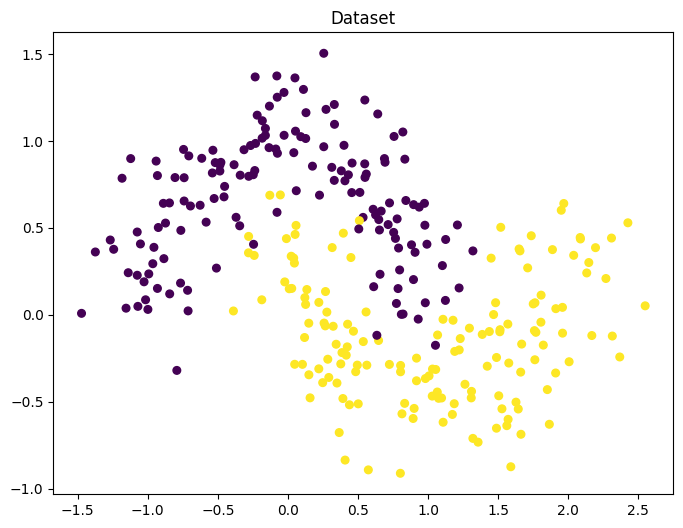

In [4]:
# adding dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.2)

# making label rather 1.0 or -1.0
y = np.where(y > np.median(y), 1.0, -1.0)

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Dataset")
plt.show()


In [5]:
# initializing a model: 2 layer neural network
model = MLP(2, [16, 16, 1])
print(len(model.parameters()))

337


In [6]:
# defining loss function

def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    scores = list(map(model, inputs))
    
    # mse loss
    losses = [(scorei - yi)**2 for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    
    # adding l2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)


total_loss, acc = loss()
print(total_loss, acc)


Value(data = 1.2716633825854005) 0.5866666666666667


In [7]:
# training process

num_iter = 100
for k in range(num_iter):


    # forward pass
    total_loss, acc = loss()

    # backward
    for p in model.parameters():
        p.grad = 0.0
    total_loss.backward()

    # update using stochstic gradient descent(SGD)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    print(f"step {k + 1} loss {total_loss.data}, accuracy {acc*100}%")

step 1 loss 1.2716633825854005, accuracy 58.666666666666664%
step 2 loss 0.6507892661955682, accuracy 81.66666666666667%
step 3 loss 0.623670650921482, accuracy 84.0%
step 4 loss 0.5507183585938592, accuracy 84.66666666666667%
step 5 loss 0.5207922902334031, accuracy 85.33333333333334%
step 6 loss 0.5198118815435216, accuracy 85.66666666666667%
step 7 loss 0.48341007632340943, accuracy 87.0%
step 8 loss 0.46873143877642826, accuracy 87.0%
step 9 loss 0.41952536861562206, accuracy 88.33333333333333%
step 10 loss 0.40929963077371134, accuracy 89.0%
step 11 loss 0.38334173182607945, accuracy 88.33333333333333%
step 12 loss 0.36914849578929937, accuracy 89.0%
step 13 loss 0.3158706288638731, accuracy 89.66666666666666%
step 14 loss 0.2927432806154564, accuracy 91.0%
step 15 loss 0.278619530771616, accuracy 92.33333333333333%
step 16 loss 0.3950687262723321, accuracy 87.66666666666667%
step 17 loss 0.231952989089552, accuracy 93.0%
step 18 loss 0.2506099349123153, accuracy 91.66666666666666

(-1.9116079693203616, 2.338392030679638)

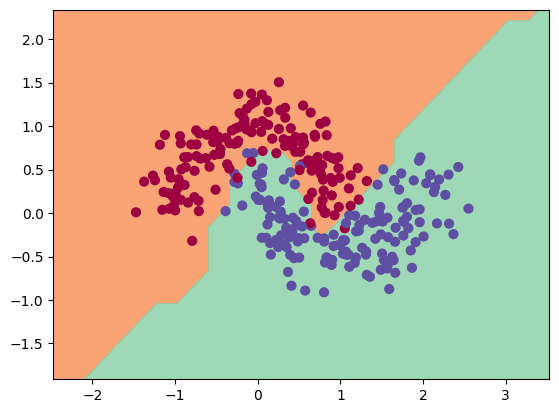

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())